In [1]:
# conda install geopandas

#conda install -c conda-forge descartes
#conda install -c conda-forge/label/gcc7 descartes
#conda install -c conda-forge/label/cf201901 descartes
#conda install -c conda-forge/label/cf202003 descartes

#conda install -c conda-forge contextily
#conda install -c conda-forge/label/gcc7 contextily
#conda install -c conda-forge/label/cf201901 contextily
#conda install -c conda-forge/label/cf202003 contextily

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("world_data/AirPollutionSeoul/Measurement_summary.csv", sep=",")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
Measurement date    647511 non-null object
Station code        647511 non-null int64
Address             647511 non-null object
Latitude            647511 non-null float64
Longitude           647511 non-null float64
SO2                 647511 non-null float64
NO2                 647511 non-null float64
O3                  647511 non-null float64
CO                  647511 non-null float64
PM10                647511 non-null float64
PM2.5               647511 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [5]:
coord_oi = df[["Longitude", "Latitude"]].drop_duplicates().reset_index(drop=True)

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=3857)

In [16]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1812498.413, 200..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105758.362, 3792946.708..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-964649.018 3205725.605, -964597.245..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((2096126.508 5765757.958, 2096127.988..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((2234260.104 5249565.284, 2204305.520..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((2292095.761 5139344.949, 2284604.344..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-6866186.192 1204901.071, -6802177.4..."


In [17]:
korea = world[world["name"] == "South Korea"]

In [18]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(coord_oi, crs=crs, geometry=gpd.points_from_xy(coord_oi.Longitude, coord_oi.Latitude))
gdf = gdf.to_crs(epsg=3857)

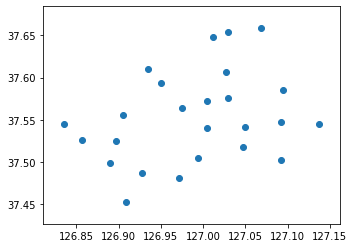

In [7]:
gdf.plot()

In [ ]:
gdf.head()

In [22]:
1e4

10000.0

(14100000.0, 14200000.0)

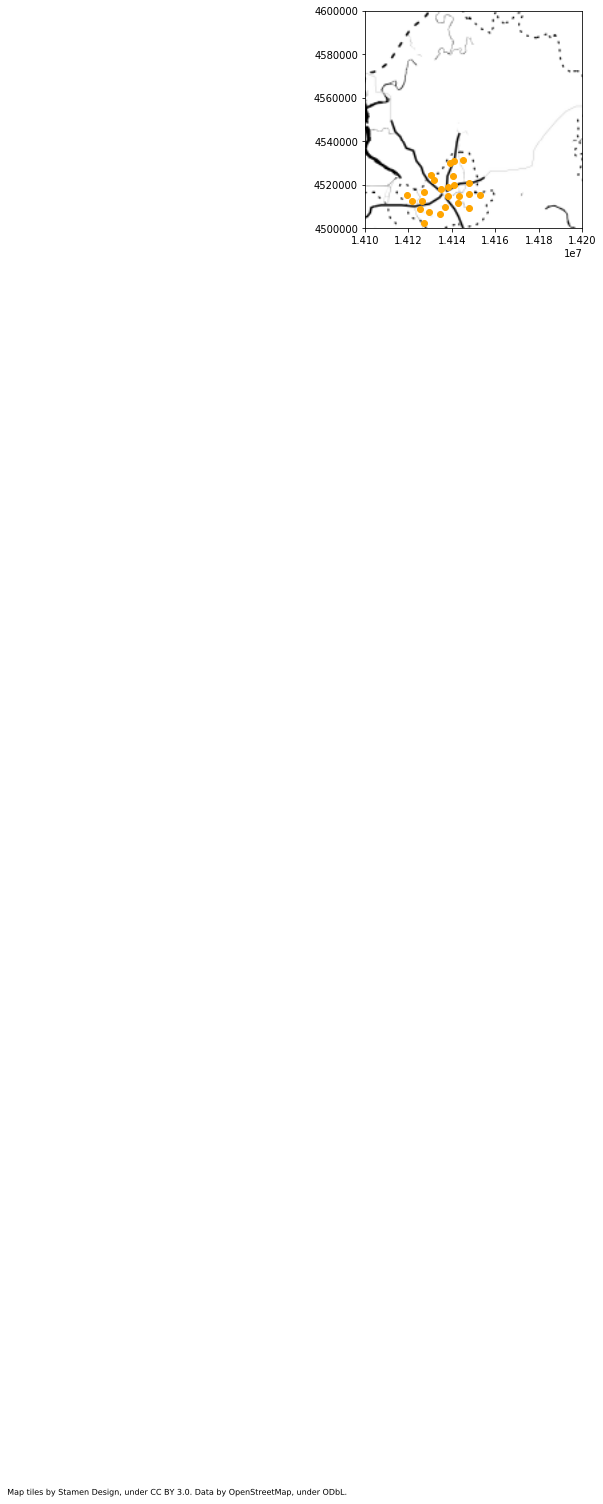

In [23]:
base = korea.plot(alpha=0)

ctx.add_basemap(base, url=ctx.sources.ST_TONER_BACKGROUND, zoom=8)

gdf.plot(ax=base, color="orange")

base.set_ylim(4500000, 4600000)
base.set_xlim(1.41e7, 1.42e7)